# 국회의원 의정활동 분석
* [word2Vec](https://woolulu.tistory.com/133)
* [dacon.io](https://dacon.io/main)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
import os
# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
process = pd.read_csv("../data/open/process.csv")
process.head(n = 1)

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,...,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN


In [5]:
 process.columns= ['대수', '공포일', '예결위심사_상정일', '예결위심사_의결일','예결위심사_회부일', \
                   '의안ID', '의안활동구분', '의안명', '의안번호','기권',\
                   '소관위원회', '위원회심사_상정일','위원회심사_의결일', '위원회심사_회부일', '정부이송일', \
                   '법사위체계자구심사_상정일', '법사위체계자구심사_의결일','법사위체계자구심사_회부일', '링크URL', '반대', \
                   '의결결과', '제안자', '제안일', '제안자구분', '본회의심의_상정일', '본회의심의_의결일', '총투표수', '찬성'
                  ]

In [ ]:
process.info()

### 국회의원 기수별 법안처리 건수 비교.

In [5]:
process.대수.value_counts().sort_values(ascending = False)

20    19422
19    13987
18    10582
17     7288
16     3236
15     2570
14     1439
13     1439
6      1198
3      1058
2       964
9       951
7       876
11      774
12      641
4       582
5       508
10      308
8       247
1       238
21      222
Name: 대수, dtype: int64

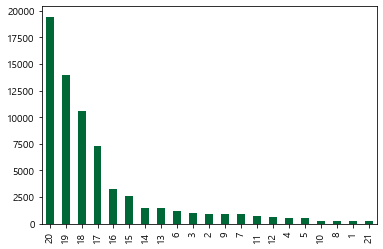

In [6]:
process.대수.value_counts().plot(kind = 'bar', colormap='RdYlGn_r')

In [6]:
suggest = pd.read_csv("../data/open/suggest.csv")
suggest.head(n = 1)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"


In [7]:
 suggest.columns= ['의안ID', '의안번호', '법률안명', '소관위원회','제안일', \
                   '처리상태', '대수', '상세페이지', '제안자','제안자목록링크',\
                   '대표발의자', '공동발의자']

In [8]:
suggest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62658 entries, 0 to 62657
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   의안ID     62658 non-null  object
 1   의안번호     62658 non-null  int64 
 2   법률안명     62658 non-null  object
 3   소관위원회    61821 non-null  object
 4   제안일      62651 non-null  object
 5   처리상태     58842 non-null  object
 6   대수       62658 non-null  int64 
 7   상세페이지    62658 non-null  object
 8   제안자      62657 non-null  object
 9   제안자목록링크  62658 non-null  object
 10  대표발의자    62566 non-null  object
 11  공동발의자    59950 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.7+ MB


## 전처리

### 법안 처리된 최종건만 놔두고 의안id가 중복되는 것은 삭제
* 법안의 `의결결과`의 최종건만 남기고 삭제

In [10]:
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68530 entries, 0 to 68529
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대수             68530 non-null  int64  
 1   공포일            15654 non-null  object 
 2   예결위심사_상정일      324 non-null    object 
 3   예결위심사_의결일      345 non-null    object 
 4   예결위심사_회부일      371 non-null    object 
 5   의안ID           68530 non-null  object 
 6   의안활동구분         68530 non-null  object 
 7   의안명            68530 non-null  object 
 8   의안번호           68530 non-null  int64  
 9   기권             3333 non-null   float64
 10  소관위원회          65305 non-null  object 
 11  위원회심사_상정일      48713 non-null  object 
 12  위원회심사_의결일      23037 non-null  object 
 13  위원회심사_회부일      55012 non-null  object 
 14  정부이송일          18412 non-null  object 
 15  법사위체계자구심사_상정일  13562 non-null  object 
 16  법사위체계자구심사_의결일  13464 non-null  object 
 17  법사위체계자구심사_회부일  12902 non-null  object 
 18  링크URL 

In [11]:
process[process['의안ID'].isna()]

,대수,공포일,예결위심사_상정일,예결위심사_의결일,예결위심사_회부일,의안ID,의안활동구분,의안명,의안번호,기권,...,링크URL,반대,의결결과,제안자,제안일,제안자구분,본회의심의_상정일,본회의심의_의결일,총투표수,찬성


In [12]:
process[process['의안번호'].isna()]

,대수,공포일,예결위심사_상정일,예결위심사_의결일,예결위심사_회부일,의안ID,의안활동구분,의안명,의안번호,기권,...,링크URL,반대,의결결과,제안자,제안일,제안자구분,본회의심의_상정일,본회의심의_의결일,총투표수,찬성


In [13]:
c1 = process.loc[process['대수']==21].duplicated(subset = ['의안ID', '의안번호'], keep = 'last')
process.loc[c1.index]

,대수,공포일,예결위심사_상정일,예결위심사_의결일,예결위심사_회부일,의안ID,의안활동구분,의안명,의안번호,기권,...,링크URL,반대,의결결과,제안자,제안일,제안자구분,본회의심의_상정일,본회의심의_의결일,총투표수,찬성
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
1,21,NaN,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,박광온의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
2,21,NaN,NaN,NaN,NaN,PRC_B2C0D0H9S2D4W1P3U3V0E2P2Y0B0R9,기타,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,한정애의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
3,21,NaN,NaN,NaN,NaN,PRC_O2T0Q0J9B2M3U2U0L0E0W1G5F6O7A5,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
4,21,NaN,NaN,NaN,NaN,PRC_E2O0V0L9L2C1E1Q3W0E4Y2A2W8I9P6,기타,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,21,NaN,NaN,NaN,NaN,PRC_K2B0G0K6P0E1C1Y5S1L3J4L1S6D8Q9,기타,2019회계연도 한국교육방송공사 결산 승인안(방송통신위원회),2100031,12.0,...,https://likms.assembly.go.kr/bill/billDetail.d...,15.0,원안가결,방송통신위원회,기타,2020-06-01,2020-09-22,2020-09-22,283.0,256.0
218,21,NaN,NaN,NaN,NaN,PRC_B2K0T0U6X0E1U1U5H1Z0Z5J1F3S5Q9,기타,2019회계연도 한국방송공사 결산 승인안(방송통신위원회),2100029,14.0,...,https://likms.assembly.go.kr/bill/billDetail.d...,13.0,원안가결,방송통신위원회,기타,2020-06-01,2020-09-22,2020-09-22,280.0,253.0
219,21,NaN,NaN,NaN,NaN,PRC_A2D0Q0P6Z0D1G1U1P4G5G5Z7O1V1M9,기타,고위공직자범죄수사처장후보추천위원회의 운영 등에 관한 규칙안(백혜련의원 외 12인),2100016,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,2.0,수정가결,백혜련의원 외 12인,의원,2020-06-01,2020-08-04,2020-08-04,188.0,186.0
220,21,2020-08-18,NaN,NaN,NaN,PRC_X2W0H0M6E0E1J1B1E4S1A2R6R5V1M4,법률안,인사청문회법 일부개정법률안(백혜련의원 등 13인),2100015,1.0,...,https://likms.assembly.go.kr/bill/billDetail.d...,2.0,수정가결,백혜련의원 등 13인,NaN,2020-06-01,2020-08-04,2020-08-04,190.0,187.0


In [9]:
process_clean = process.drop_duplicates(subset = ['의안ID', '의안번호'], keep='last', inplace = False)

In [15]:
process_clean

,대수,공포일,예결위심사_상정일,예결위심사_의결일,예결위심사_회부일,의안ID,의안활동구분,의안명,의안번호,기권,...,링크URL,반대,의결결과,제안자,제안일,제안자구분,본회의심의_상정일,본회의심의_의결일,총투표수,찬성
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
1,21,NaN,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,박광온의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
2,21,NaN,NaN,NaN,NaN,PRC_B2C0D0H9S2D4W1P3U3V0E2P2Y0B0R9,기타,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,한정애의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
3,21,NaN,NaN,NaN,NaN,PRC_O2T0Q0J9B2M3U2U0L0E0W1G5F6O7A5,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
4,21,NaN,NaN,NaN,NaN,PRC_E2O0V0L9L2C1E1Q3W0E4Y2A2W8I9P6,기타,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68525,1,1948-07-17,NaN,NaN,NaN,6,기타,헌법안(헌법기초위원장),10007,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,수정가결,헌법기초위원장,위원장,1948-06-23,NaN,1948-07-12,NaN,NaN
68526,1,1948-10-02,NaN,NaN,NaN,5,법률안,국회법안(국회법기초특별위원장),10006,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회법기초특별위원장,NaN,1948-06-08,NaN,1948-06-10,NaN,NaN
68527,1,NaN,NaN,NaN,NaN,3,법률안,지방자치조직법안(내무위원장),10004,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,회기불계속폐기,내무위원장,NaN,1948-05-31,NaN,1948-12-18,NaN,NaN
68528,1,1948-09-22,NaN,NaN,NaN,2,법률안,반민족행위처벌법안(특별법기초위원장),10003,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,수정가결,특별법기초위원장,NaN,1947-08-16,NaN,1948-09-07,NaN,NaN


## 발의법안의 세부내용 크롤링

In [ ]:
import numpy as np
def get_content(idx):
    content = []
    try:
        url = suggest.loc[idx, '상세페이지']
        page = urlopen(url)
        html = BeautifulSoup(page, "html.parser")
        tmp = html.find('div', 'textType02').get_text()
        tmp = tmp.replace("\n", "").replace("\t", "").replace("\r", "")
        content  = [tmp]
    except:
        content = np.nan
    return content

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from tqdm import tqdm_notebook
import time
import numpy as np

result = []
for idx in tqdm_notebook(suggest.index):
    try:
        data = get_content(idx)
        result.append(data)
        time.sleep(1)
    except:
        data = np.nan
        result.append(data)
        time.sleep(1)        

In [ ]:
suggest['제안내용'] = result[4]

In [ ]:
suggest['제안내용'] = pd.Series(result)

**#ValueError: Length of values (1) does not match length of index (62658)**<br>
위와 같은 에러가 나는 경우는, 리스트타입을 데이터프레임에 바로 넣을때 데이터프레임의 인덱스의 길이와 넣고자 하는 리스트의 길이가 맞지 않아서 생기는 에러이다.<br>
이런 경우엔, 넣고자 하는 리스트를 pd.Series타입으로 변환해서 넣어주면 ,없는 행의 경우엔 자동적으로 nan값으로 채워준다.

In [ ]:
suggest.to_csv("../data/open/suggest_renew_org.csv", encoding = 'utf-8', index = False)

In [ ]:
suggest_renew = pd.read_csv("../data/open/suggest_renew_org.csv", encoding = "utf-8", index_col = 0)

In [ ]:
suggest_renew.info()

## 전처리

In [4]:
import re
from nltk import word_tokenize
from soynlp.noun import LRNounExtractor_v2
from soynlp.tokenizer import LTokenizer

from soynlp.postagger import Dictionary
from soynlp.postagger import LRTemplateMatcher
from soynlp.postagger import LREvaluator
from soynlp.postagger import SimpleTagger
from soynlp.postagger import UnknowLRPostprocessor

# Gensim
import gensim

In [ ]:
suggest_renew["발의키워드"] = suggest_renew["제안내용"].str.replace("[^ㄱ-힗]|제안이유 및 주요내용|제안이유|및|ㆍ",' ')

In [ ]:
suggest_renew["발의키워드"][0]

In [ ]:
suggest_renew["제안내용"][0]

In [ ]:
suggest_renew.info()

In [ ]:
suggest_renew.to_csv("../data/open/suggest_renew_org.csv", encoding = 'utf-8')

In [4]:
df = pd.read_csv("../data/open/suggest_renew_org.csv", encoding = 'utf-8', index_col = 0)

In [56]:
# bill = df.loc[df.대수 == 21, '제안내용']
bill = df['제안내용']

In [57]:
bill = [re.sub('[^ㄱ-힗]|제안이유 및 주요내용|제안이유|및|ㆍ', ' ',str(sent)) for sent in bill]

noun_extractor = LRNounExtractor_v2(verbose=True)
nouns = noun_extractor.train_extract(bill)
nouns

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 548142 from 62658 sents. mem=1.071 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=8771405, mem=1.506 Gb
[Noun Extractor] batch prediction was completed for 215012 words
[Noun Extractor] checked compounds. discovered 156526 compounds
[Noun Extractor] postprocessing detaching_features : 229869 -> 199669
[Noun Extractor] postprocessing ignore_features : 199669 -> 199518
[Noun Extractor] postprocessing ignore_NJ : 199518 -> 197677
[Noun Extractor] 197677 nouns (156526 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.453 Gb                    
[Noun Extractor] 84.99 % eojeols are covered


{'반환공여구역주변지역': NounScore(frequency=46, score=1.0),
 '정보통신망게임제공업': NounScore(frequency=3, score=1.0),
 '한국승강기안전관리원': NounScore(frequency=17, score=1.0),
 '종합신용정보집중기관': NounScore(frequency=35, score=1.0),
 '국제유류오염보상기금': NounScore(frequency=2, score=1.0),
 '중소기업투자모태조합': NounScore(frequency=17, score=0.8666666666666667),
 '한국시설안전기술공단': NounScore(frequency=7, score=1.0),
 '大淸湖上水源管理地域': NounScore(frequency=2, score=0.3333333333333333),
 '정보통신서비스제공자': NounScore(frequency=96, score=1.0),
 '한국정보통신산업협회': NounScore(frequency=2, score=1.0),
 '주요정보통신기반시설': NounScore(frequency=44, score=1.0),
 '장애인정책조정위원회': NounScore(frequency=21, score=1.0),
 '여성고용안정지원센터': NounScore(frequency=6, score=1.0),
 '벤처기업육성촉진지구': NounScore(frequency=10, score=1.0),
 '세계문화유산관광도시': NounScore(frequency=8, score=1.0),
 '소방공무원징계위원회': NounScore(frequency=6, score=1.0),
 '국민소환투표청구권자': NounScore(frequency=17, score=1.0),
 '식품의약품안전처고시': NounScore(frequency=4, score=1.0),
 '국가균형발전특별회계': NounScore(frequency=52, score=1.0),
 '무선전자개체식별

### 가장 빈번한 단어 찾기

In [47]:
from collections import Counter
def find_common_words():
    common_words = Counter.most_common(nouns)
    return common_words

In [48]:
common_words = find_common_words

In [49]:
common_words

[('제', NounScore(frequency=14171, score=0.948051948051948)),
 ('등', NounScore(frequency=10954, score=0.9997028673302629)),
 ('조', NounScore(frequency=8154, score=0.9901579901579901)),
 ('안', NounScore(frequency=7823, score=0.7021276595744681)),
 ('수', NounScore(frequency=7040, score=0.9337016574585635)),
 ('대', NounScore(frequency=6604, score=0.996001230390649)),
 ('것', NounScore(frequency=5517, score=0.9996210685865858)),
 ('경우', NounScore(frequency=5412, score=0.9982118909253465)),
 ('이에', NounScore(frequency=4692, score=1.0)),
 ('위', NounScore(frequency=4058, score=0.9415741187831965)),
 ('조제', NounScore(frequency=3652, score=1.0)),
 ('있도록', NounScore(frequency=3646, score=1.0)),
 ('규정', NounScore(frequency=3250, score=1.0)),
 ('신설', NounScore(frequency=3156, score=1.0)),
 ('년', NounScore(frequency=2889, score=0.996937212863706)),
 ('필요', NounScore(frequency=2656, score=1.0)),
 ('현행법', NounScore(frequency=2655, score=1.0)),
 ('지원', NounScore(frequency=2252, score=0.9975339087546239)

### 불용어 처리 및 명사목록화

In [58]:
# 불용어 처리 및 명사 목록화
def stopwords_reg():
    stopwords = ['경우', '이에', '있도록', '조제', '아니', '위해', '위하여', '이를', '이상', '이하', '등으로']
    words = {word for word, score in nouns.items() if (word not in stopwords) and (len(word) > 1)}
    return words

In [59]:
words = stopwords_reg()
words

{'복수설립',
 '전국소비자물가변동율',
 '보호조치사실',
 '재테크',
 '국세징수사무',
 '차량잔존',
 '현황구분신고',
 '주택건설사업자',
 '복합자재',
 '범죄수익등',
 '番號紙',
 '자격유형',
 '주요골자실업대책사업',
 '설치신고서류',
 '보수산정',
 '平生學習',
 '위기관리능력',
 '기후변화대응기본법',
 '방위산업육성',
 '문화법인',
 '극지활동진흥',
 '청구권한',
 '候補者登錄申請',
 '事業斡旋',
 '착용하도',
 '국민기초',
 '개별가맹',
 '세계문화유산도시지구',
 '취업유인',
 '한민고등학교',
 '關聯業者들',
 '石油',
 '의사방해방지',
 '한국산림복지공단',
 '우수연구센터',
 '보호기금',
 '입학식',
 '레저관광기반시설사업',
 '국적불명',
 '보상계약',
 '기업신용조회회사',
 '해외자원확보',
 '종합부동산세액상당액',
 '변호사연수교육',
 '大麻',
 '유출량',
 '靑少年福祉',
 '장애여성가구',
 '공동모금회',
 '유흥주점영업',
 '정부부담',
 '搜査業務',
 '良心',
 '同參',
 '대외경제협력기금법',
 '공개재판주의',
 '고부가가치산업',
 '어촌진흥사업',
 '실무지원',
 '행사장',
 '세제지원제도',
 '포항지진피해',
 '검찰총장후보',
 '장기요양',
 '제공과정',
 '공무원연금가입',
 '에너지소비량',
 '이장비용',
 '영속',
 '배치권한',
 '수수혐의',
 '조례위반행위',
 '體育行政',
 '탄광지역개발사업',
 '지역보상협의회',
 '치안산업',
 '방문보건서비스',
 '분과실행위원회',
 '사용요금',
 '船舶需要',
 '사료가격안정기금법안',
 '중앙지부',
 '부역혐의',
 '심판기구',
 '혁신종합지원센터',
 '拘束場所',
 '일반활자',
 '고용변동',
 '국가정보통신기반안전',
 '전문운용사',
 '오송생명',
 '전면실시',
 '시책들',
 '긴급복지지원',
 '살기運動協議',
 '주요골자敎職員',
 '사이버선거부

In [40]:
# 명사 등록를 등록하고, 명사로 처리된 단어만 Tagging하여 Tokenizing처리함
def noun_tagging():
    pos_dict = {
        'Noun': words
    }
    dictionary = Dictionary(pos_dict)
    generator = LRTemplateMatcher(dictionary)
    evaluator = LREvaluator()
    postprocessor = UnknowLRPostprocessor()
    
    tagger = SimpleTagger(generator, evaluator, postprocessor)
    bill_nouns = [" ".join([word for word, tag in tagger.tag(sent) if tag == 'Noun']) for sent in bill]
    return bill_nouns

In [60]:
bill_nouns = noun_tagging()

In [61]:
bill_nouns

['독점규제 공정거래 법률 공정거래법 시장경제 기본규칙 제정 이후 공정 거래질서 확립 우리 경제 경쟁력 주요 기여 최근 경제환경 시장상황 크게 변화 규제 재설계 필요성 제기 있음 공적 집행 한계 보완 민사적 구제수단 도입 담합 전속고발제 폐지 공정거래법 집행 수단 다원화 방향 법집행 체계 전반적 정비 대기업집단 잘못 지배구조 거래 행태 개선 중소기업 정당 경쟁 기회 보장 편법적 지배력 확대 수단 등에 규율 강화 공정거래위원회 법집행 절차적 적법성 피조사기업 방어권 강화함으 혁신성장 공정경제 구현 등을 제도적 뒷받침',
 '현행법 지방교육재정교부금 재원 내국세 총액 담배 개별소비세 등을 제외 금액 교육세 일부 규정 있음 그런데 소방공무원 국가직 전환 소방인력 충원 지원 지방교부세법 개정 소방안전교부세율 담배 부과 개별소비세 총액 상향 소방안전교부세율 인상 지방교육재정교부금 재원 내국세 감소하므 교육재정교부금 산정 대상 내국세 총액 제외 담배 개별소비세 개정 참고사항 법률안 의원 대표발의 지방교육세 일부개정법률안 의안번호 의결 전제로 법률안 의결 수정의결 조정',
 '현행법 농업기계 제조 수입업자 용도 기계 구분 명확히 농업인 알권리 보장 제조 수입 농업 트랙 동력운반차 농업기계 대하여 농업 표시 하도 시행규칙 농업기계 형식표지판 해당 농업기계 본체 엔진 부착하도 있음 형식표지판 금속 스티커 제작 탈부착 용이 기존 형식표지판 제거 새로 형식표지판 부착 해당 농업기계 제조연월 방법 문제 지적 실제 농기계 제조업체 이러 악용 대리점 제조연월 조작하도 지시 의혹 제기 있음 농업 표시 제조연월 농업기계 본체 엔진 각인 형태 누구 제조연월 표시 알아 곤란 행위 못하도록 함으 농업기계 농업인 알권리 보장 강화',
 '현행 소방공무원 국가직 전환 이후 소방안전교부세율 담배 부과 개별소비세 소방안전교부세 개별소비세법 담배 부과 개별소비세 총액 초과 부분 소방인력 인건비 우선 충당하 도록 법적 근거 마련 도의 열악 재정여건 년까지 예정 만명 소방인력 충원 고려 소방공무원 충원 계

In [ ]:
df['발의_단어'] = bill_nouns

In [ ]:
df.to_csv("../data/open/suggest_renew_org.csv", encoding = 'utf=8', index = False)

In [68]:
df.head(n =1)

,의안ID,의안번호,법률안명,소관위원회,제안일,처리상태,대수,상세페이지,제안자,제안자목록링크,대표발의자,공동발의자,제안내용,발의키워드,발의_단어
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤",['「독점규제 및 공정거래에 관한 법률」(이하 “공정거래법”이라 함)은 시장경제의 ...,독점규제 공정거래에 관한 법률 이하 공정거래법 이라 함 은 시장경제의 ...,독점규제 공정거래 법률 공정거래법 시장경제 기본규칙 제정 이후 공정 거래질서 확립 ...


### 국회의원 정보

#### 국회 회기별 국회의원

In [19]:
lawpeople = pd.read_csv("../data/open/new_people.csv", encoding = 'cp949')
lawpeople.head(n = 1)[['DAE_NM', 'NAME','DAESU']]

,DAE_NM,NAME,DAESU
0,21대의원,강기윤,21


####  국회의원의 회기별 소속정당 정보

In [20]:
party = pd.read_excel("../data/open/국회의원인적사항.xls")
party.head(n = 1)

,이름,한자명,영문명칭,음/양력,생년월일,정당명,선거구,재선,당선,위원회,성별,전화번호,이메일,홈페이지,보좌관,비서관,비서,재직구분
0,강기윤,姜起潤,KANG GIYUN,음,1960-06-04,국민의힘,경남 창원시성산구,재선,"제19대, 제21대",보건복지위원회,남,02-784-1751,ggotop@naver.com,http://blog.naver.com/ggotop,"김홍광, 한영애","박응서, 최광림","김영록, 안효상, 이유진, 홍지형, 김지훈",60001


In [24]:
pty_people = lawpeople.merge(party,how = 'left', left_on = 'NAME', right_on = '이름')[['DAESU', 'DAE_NM', 'NAME', 'NAME_HAN', '정당명']]

In [119]:
pty_people.rename(columns = {'정당명':'PART_NAME'}, inplace = True)

#### 소속정당별 국회의원정보

In [ ]:
pty_people.to_csv("../data/open/party_people.cvs", encoding = 'utf-8', index = False)

In [123]:
pty_people.head(n = 1)

,DAESU,DAE_NM,NAME,NAME_HAN,PART_NAME
0,21,21대의원,강기윤,姜起潤,국민의힘


### 법안별 소속정당 표시
* 대표발의자를 기준

In [ ]:
suggest_party = df.merge(right = pty_people, how = 'left', left_on = ['대표발의자', '대수'], right_on =['NAME','DAESU'] )[['의안ID','PART_NAME','의안번호','법률안명','소관위원회','제안일','처리상태','대수','상세페이지','제안자','제안자목록링크','대표발의자','공동발의자','제안내용','발의키워드','발의_단어']]

In [ ]:
suggest_party.to_csv("../data/open/suggest_party.csv", encoding = 'utf-8', index = False)

In [139]:
suggest_party.head(n = 1)

,의안ID,PART_NAME,의안번호,법률안명,소관위원회,제안일,처리상태,대수,상세페이지,제안자,제안자목록링크,대표발의자,공동발의자,제안내용,발의키워드,발의_단어
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,더불어민주당,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤",['「독점규제 및 공정거래에 관한 법률」(이하 “공정거래법”이라 함)은 시장경제의 ...,독점규제 공정거래에 관한 법률 이하 공정거래법 이라 함 은 시장경제의 ...,독점규제 공정거래 법률 공정거래법 시장경제 기본규칙 제정 이후 공정 거래질서 확립 ...


# 발의안 분석

### 필요한 패키지 로드

In [25]:
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from PIL import Image
from gensim.models import word2vec
import gensim


import seaborn as sns
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

### 1. 워드클라우드를 이용한 21대 국회 발의안 분석

In [7]:
df = pd.read_csv("../data/open/suggest_party.csv")

In [8]:
dp = ('더불어민주당', '열린민주당')
op = ('국민의힘', '정의당', '시대전환', '무소속', '국민의당', '기본소득당')

### 단어 데이터 만들기
* 전체
* 정당(여당/ 야당)

In [16]:
billWord = df.loc[(df['AGE']== 21) & (df['BILL_WORD'].notna()), 'BILL_WORD']

In [17]:
billWord_dp = df.loc[(df['AGE']== 21) & (df['BILL_WORD'].notna()) & (df['PART_NAME'].isin(dp)), 'BILL_WORD']
billWord_dp

In [ ]:
billWord_op = df.loc[(df['AGE']== 21) & (df['BILL_WORD'].notna()) & (df['PART_NAME'].isin(op)), 'BILL_WORD']
billWord_op

In [ ]:
data_file = "bill_word.data"

with open(data_file,mode = 'w', encoding = 'utf-8') as f:
    f.write("\n".join(billWord.to_list()))

In [22]:
keywords = word2vec.LineSentence(data_file_dp)
# type(keywords), dir(keywords)

model = word2vec.Word2Vec(keywords, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("bill_word_dp.model")

In [34]:
keywords = word2vec.LineSentence(data_file_op)
# type(keywords), dir(keywords)

model = word2vec.Word2Vec(keywords, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("bill_word_op.model")

### 모델 로드 
* 21대 당에 상관없이 발의 키워드 분석
* 여당/야당 별로 분석 

In [26]:
model = word2vec.Word2Vec.load("bill_word.model")
model_dp = word2vec.Word2Vec.load("bill_word_dp.model")
model_op = word2vec.Word2Vec.load("bill_word_op.model")

## 1. 21대 국회발의안 워드클라우드 분석

In [27]:
cmaps=['viridis', 'plasma', 'inferno', 'magma', 'cividis','Greys', 'Purples', 'Blues', 'Greens', 'Oranges',
       'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu',
       'PuBuGn', 'BuGn', 'YlGn','binary','gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring',
       'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot','afmhot', 'gist_heat', 'copper','PiYG',
       'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral','coolwarm', 'bwr',
       'seismic','hsv','Pastel1', 'Pastel2', 'Paired', 'Accent','Dark2', 'Set1',
       'Set2', 'Set3','tab10', 'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth',
       'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet',
       'nipy_spectral', 'gist_ncar']

len(cmaps)

80

In [34]:
assemblyMask = np.array(Image.open("../data/open/국회.png"))

def show_wordCloud(kwrd, c):
    wordcloud = WordCloud(font_path = "C:/Windows/Fonts/Jalnan.ttf",
                     background_color = 'white',
                     relative_scaling = 1,
                     mask = assemblyMask,
                     max_font_size = 90,
                     stopwords=None,
                     colormap = c
                     ).generate_from_frequencies(dict(model.most_similar(kwrd, topn= 300)))
    plt.figure(figsize = (30, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

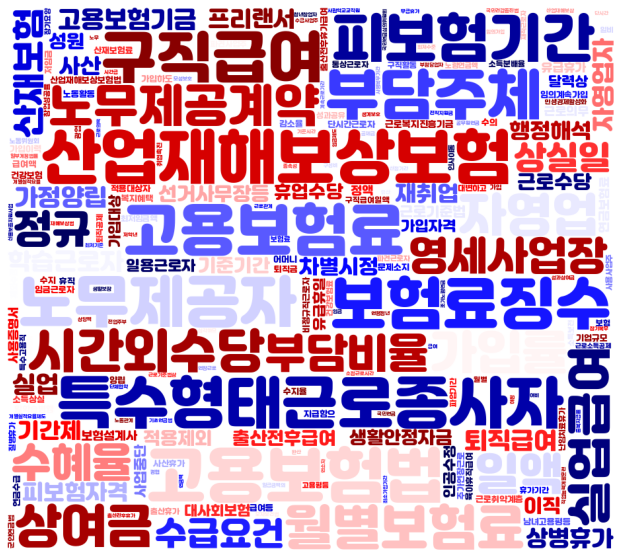

In [36]:
show_wordCloud('고용보험', cmaps[50])

## 2. word2Vec을 이용한 법안 키워드 시각화 
* 법안의 키워드로 보는 시각화
* 정당(여당/야당)으로 보는 키워드 시각화

보여주기 옵션  : 1번 - 정당 상관없음 , 2번 - 여당/야당으로 보여주기.
보여주기 옵션 선택 : 2
입력하고 하는 법안키워드 :고용보험
보여주고자 하는 키워드 수 : 20


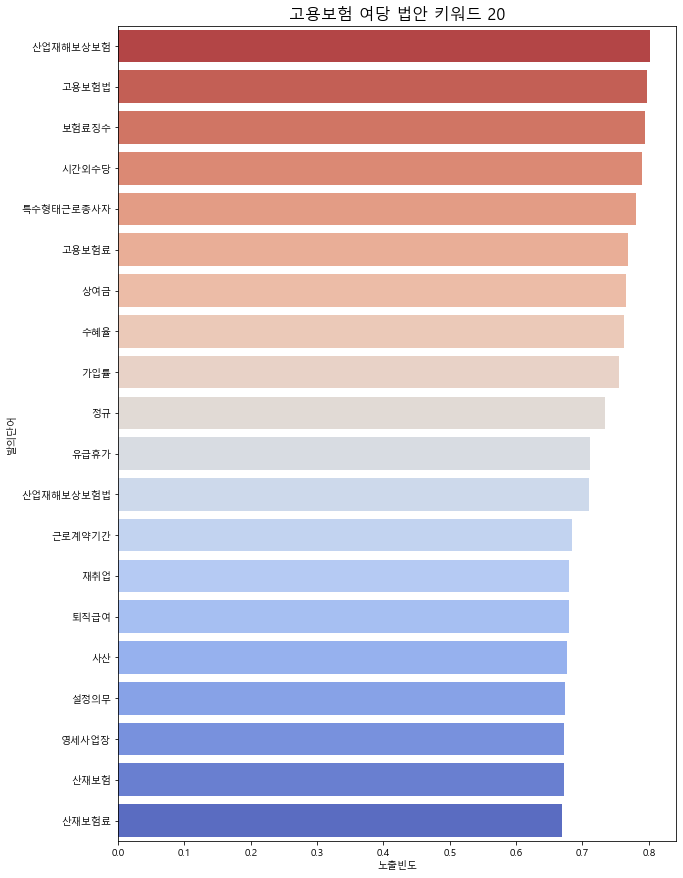

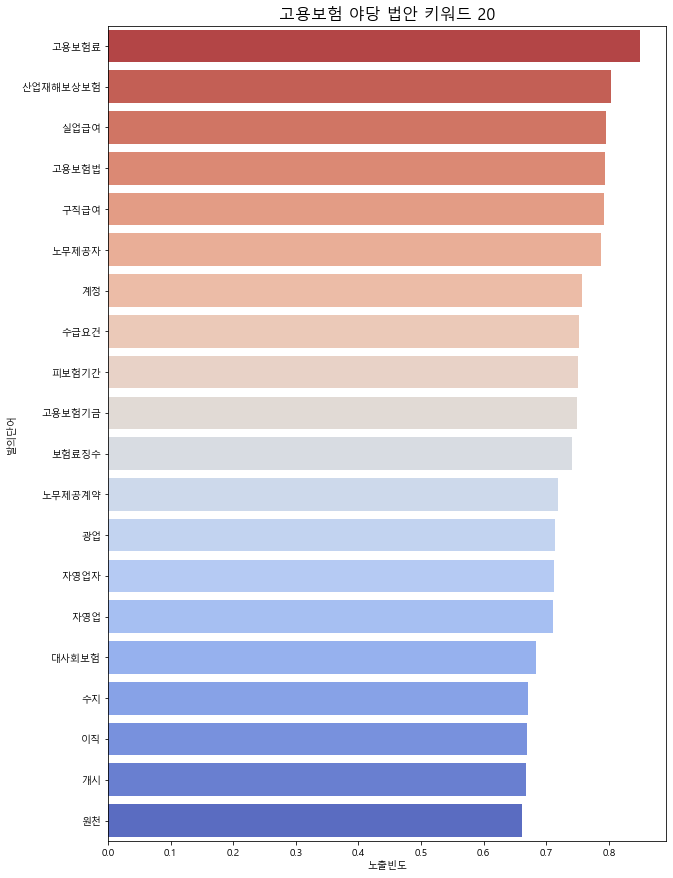

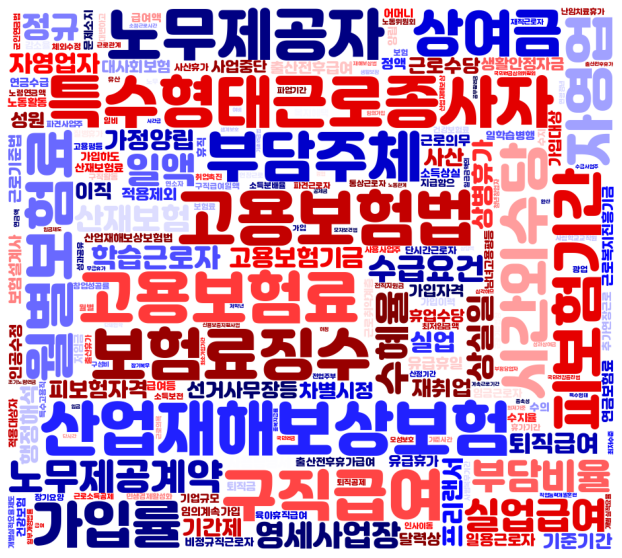

In [38]:
# 분석하고자 하는 발의의제에 대한 키워드 분석 후 데이터 프레임 리턴 
def get_billDetail(kywrd: str, select,cnt=30):
    tags_count_df = []
    try:
        if select == 1:
            tags_count_df.append(pd.DataFrame(model.most_similar(kywrd, topn = cnt)))
        else:
            tags_count_df.append(pd.DataFrame(model_dp.most_similar(kywrd, topn = cnt)))
            tags_count_df.append(pd.DataFrame(model_op.most_similar(kywrd, topn = cnt)))        
    except KeyError:
        tags_count_df = pd.DataFrame()
        print('존재하는 않는 키워드입니다.')
    except UnboundLocalError:
        print('예외 오류 발생')
    return tags_count_df
def show_billVisualization(df, kwrd, select, cnt):
    if select == '1':
        #tags_count_df.columns = ['발의단어', '노출빈도']
        df[0].columns = ['발의단어', '노출빈도']
        plt.figure(figsize = (10, 15))
        sns.barplot(x = '노출빈도', y = '발의단어', data = df[0], palette='coolwarm_r')
        plt.title('{} 법안 키워드 {}'.format(kwrd, cnt), fontsize=16)
    else:
        df[0].columns = ['발의단어', '노출빈도']
        plt.figure(figsize = (10, 15))
        sns.barplot(x = '노출빈도', y = '발의단어', data = df[0], palette='coolwarm_r')
        plt.title('{} 여당 법안 키워드 {}'.format(kwrd, cnt), fontsize=16)
        
        df[1].columns = ['발의단어', '노출빈도']
        plt.figure(figsize = (10, 15))
        sns.barplot(x = '노출빈도', y = '발의단어', data = df[1], palette='coolwarm_r')
        plt.title('{} 야당 법안 키워드 {}'.format(kwrd, cnt), fontsize=16)
def bill_main(kwrd: str, select, cnt=30):
    df = get_billDetail(kwrd, select, cnt)
    show_billVisualization(df,kwrd, select, cnt)
    color = cmaps[50]
    show_wordCloud(kwrd, color)
if __name__ == "__main__":
    print("보여주기 옵션  : 1번 - 정당 상관없음 , 2번 - 여당/야당으로 보여주기.")
    select = input("보여주기 옵션 선택 : ")
    if len(select) < 1:
        print('선택해')
    else:
        keyword = input("입력하고 하는 법안키워드 :")
        cnt  = int(input("보여주고자 하는 키워드 수 : "))
        bill_main(keyword, select, cnt)

## 법안 키워드별 여당/야당 법안의 키워드 분석
### 1)코로나
* `코로나`의 경우를 보면 여당의 경우는 경기에 대한 대책,산업계(항공,소비산업,말산업)에 집중되어있음.
특히, `말산업`키워드의 경우는 `코로나`로 인한 경마중단으로 인한 `말산업` 피해관련 대책인것으로 보인다.
* [관련뉴스 - 코로나19 여파로 경마중단… '축발기금' 고갈 현실화](http://www.kenews.co.kr/news/article.html?no=14873)<br>
  [코로나에 무너진 말산업…氣 살릴 해법은 없는걸까](https://www.hankyung.com/sports/article/2020092764761) 
* 야당의 `코로나` 키워드에 대한 법안
  집권당과 야당의 차이인지는 모르겠지만 경기대책에 대한 키워드는 적고,`코로나`로 파생된 단어,예를 들면 `백신`, `치료제`, `신종감염병`, `바이러스`에 집중되어있는것이 차이점

In [14]:
from IPython.display import Image

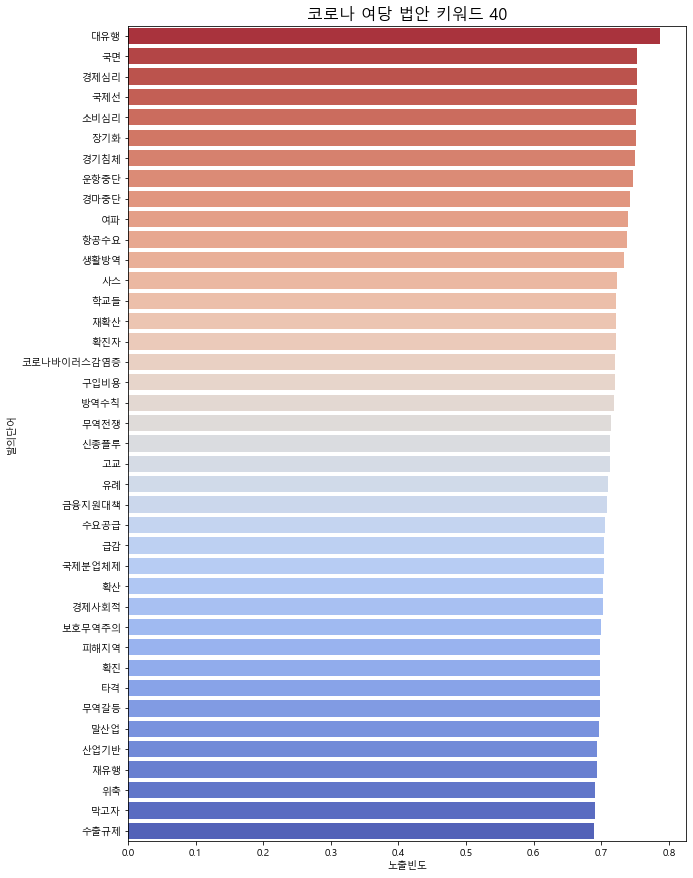

In [15]:
Image("../data/open/코로나여당.png")

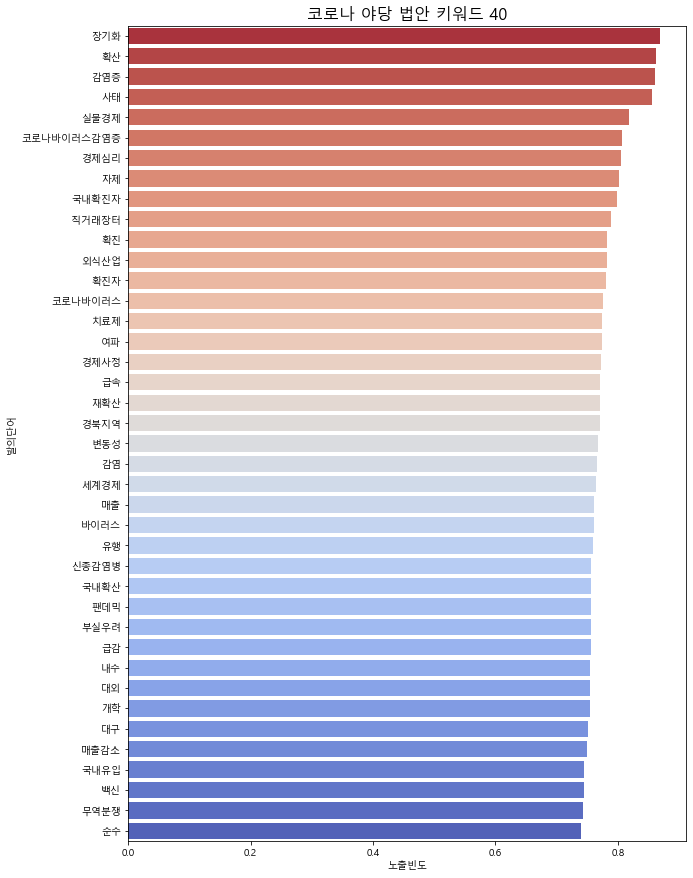

In [16]:
Image("../data/open/코로나야당.png")

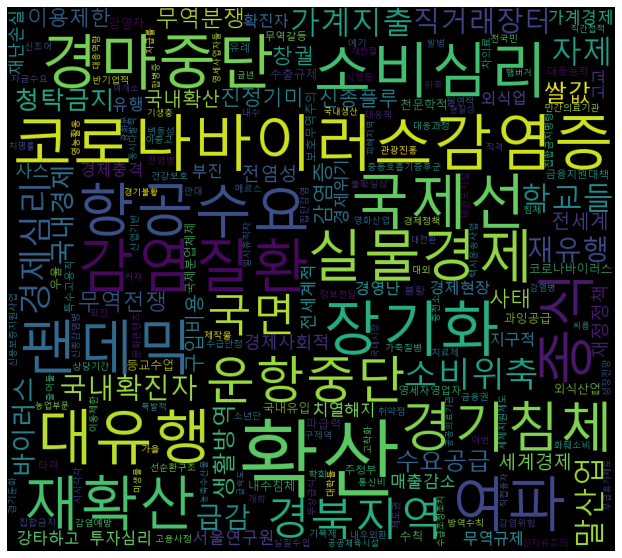

In [17]:
Image("../data/open/코로나_워드클라우드.png")

### 2)주택
* `주택`의 경우를 보면 여당은 `투기`에 대한 규제 및 주택가격 안정에 집중되어 있음(결과론적으로 실패)
`분양가상한제`, `임대주택`,`장기보유`란 키워드가 상단에 노출되었으면 하는 바램.
* 야당의 경우 눈에 띄는 키워드 `자서분양`<br>
`실수요자` 및 `실소유자`의 세부담에 집중되어 있는것으로 보임<br>
  [자서분양으로 건설사 배불리기는 기망행위](https://www.geojenews.co.kr/news/articleView.html?idxno=60906)<br>
  [자서분양 금지 법안 제출](https://www.pressian.com/pages/articles/2020091615575755262)

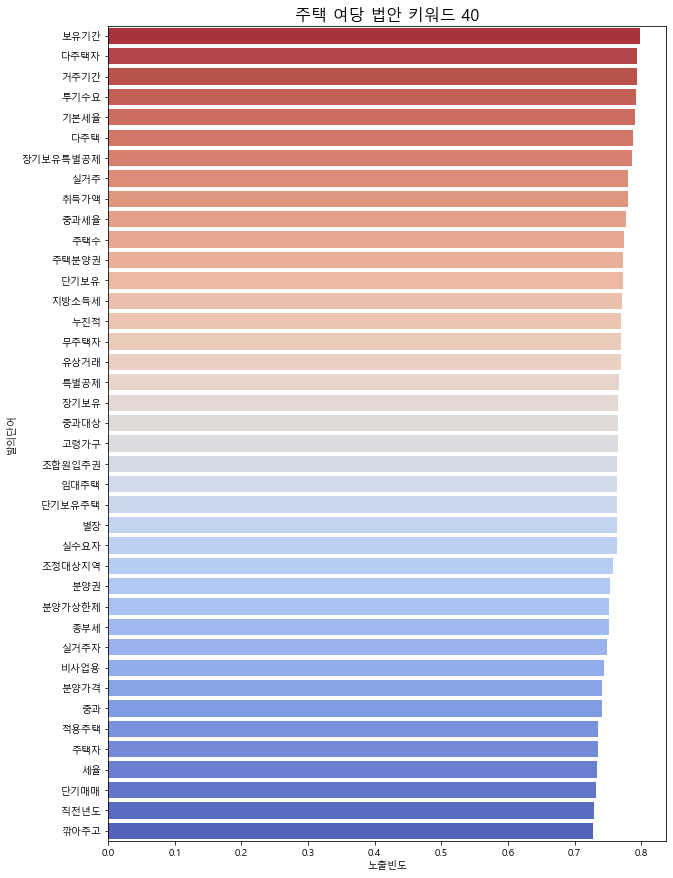

In [21]:
Image("../data/open/주택여당.png")

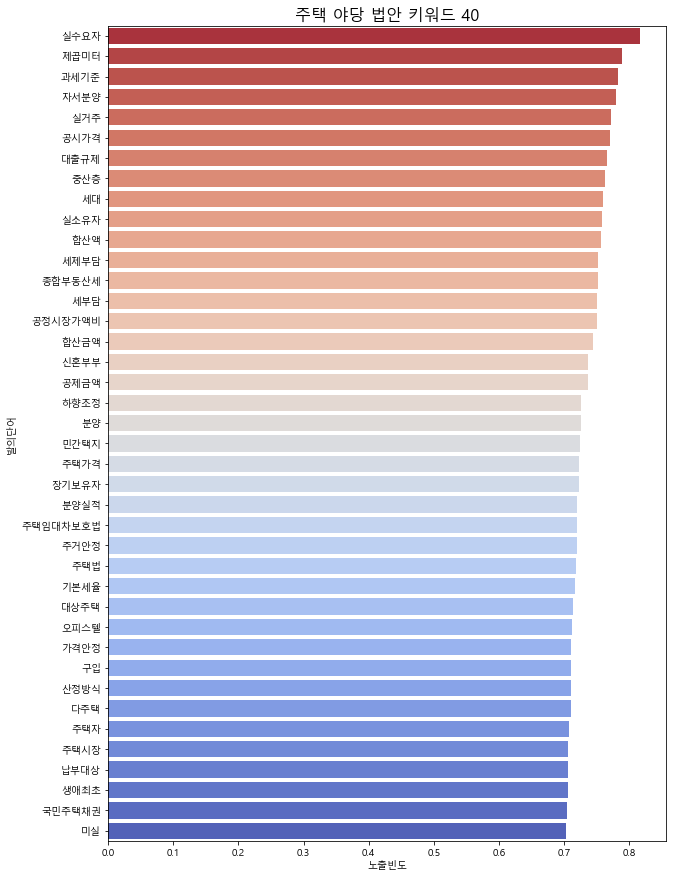

In [20]:
Image("../data/open/주택야당.png")

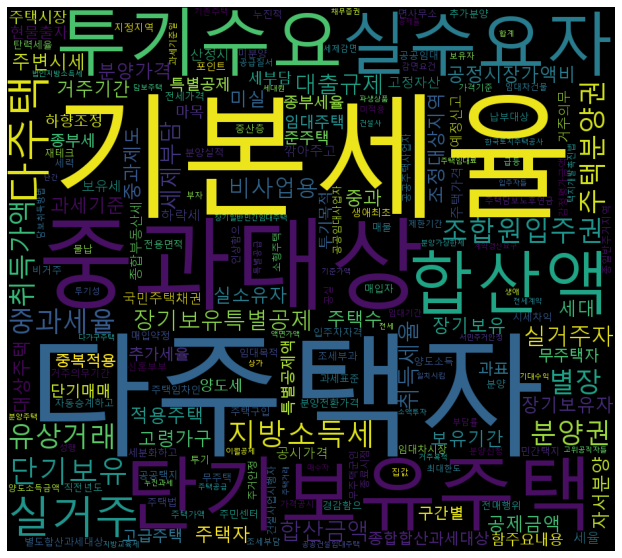

In [19]:
Image("../data/open/주택_워드클라우드.png")